In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [3]:
'''
path_to_formulas = 'Data/Data_Bank/formulas.lst',
                  path_to_image_names= 'Data/Data_Bank/images',


'''


data = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=300*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.95,
                vocabulary_path = 'Data/Data_Bank/300k.json',
                
                load_vocabulary = True,
                 


                 batch_size = 64,
                num_workers = 10,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_data()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [4]:
data.df

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,R _ { 1 2 } K _ { 1 } R _ { 2 1 } d K _ { 2 } ...,80f1db54ec657ab.png,20,200,105,"[R, _, {, 1, 2, }, K, _, {, 1, }, R, _, {, 2, ...",53
1,E _ { n } - E _ { m } = \frac { \lambda ^ { \p...,4c0c01a5fb03248.png,39,169,106,"[E, _, {, n, }, -, E, _, {, m, }, =, \frac, {,...",46
2,\sigma ^ { 1 } + i \sigma ^ { 2 } = f ( \sigma...,3f55826fd850d77.png,19,138,75,"[\sigma, ^, {, 1, }, +, i, \sigma, ^, {, 2, },...",28
3,B | _ { \partial \Sigma _ { 3 } } \rightarrow ...,a6a043f87f6ffdc.png,20,142,123,"[B, |, _, {, \partial, \Sigma, _, {, 3, }, }, ...",36
4,\phi _ { i } ^ { \prime } ( x ) = \phi _ { i }...,4d0e536147c711b.png,18,175,118,"[\phi, _, {, i, }, ^, {, \prime, }, (, x, ), =...",43
...,...,...,...,...,...,...,...
238324,"< \tilde { \phi } _ { \omega } , \phi _ { \ome...",f39eae8d337aa45.png,34,415,310,"[<, \tilde, {, \phi, }, _, {, \omega, }, ,, \p...",104
238325,S = { \frac { 1 } { 8 \pi } } \int d x d y \le...,4300c834ccf1441.png,37,354,231,"[S, =, {, \frac, {, 1, }, {, 8, \pi, }, }, \in...",80
238326,A _ { \mu i j } ^ { a } = < \psi _ { j } ^ { a...,e905b0f81c6129c.png,35,128,126,"[A, _, {, \mu, i, j, }, ^, {, a, }, =, <, \psi...",49
238327,"B _ { I } ( f , g ) = B _ { J } ( f , g ) , \q...",86ff16d9846059b.png,17,185,62,"[B, _, {, I, }, (, f, ,, g, ), =, B, _, {, J, ...",26


In [17]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [6]:
# prepeares the dataloaders with transformations and splits train/val
data.setup()

Train/Val Data is ready for Model loading.


In [7]:
data.inverse_vocabulary

{0: '<S>',
 1: '<E>',
 2: '<P>',
 3: '!',
 4: '"',
 5: '&',
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '--',
 13: '---',
 14: '.',
 15: '/',
 16: '0',
 17: '0.14',
 18: '0.4',
 19: '0.5',
 20: '0.7',
 21: '1',
 22: '1.5',
 23: '10',
 24: '2',
 25: '3',
 26: '4',
 27: '5',
 28: '6',
 29: '7',
 30: '8',
 31: '8.5',
 32: '9',
 33: ':',
 34: ';',
 35: '<',
 36: '=',
 37: '>',
 38: '?',
 39: '@',
 40: 'A',
 41: 'B',
 42: 'C',
 43: 'D',
 44: 'E',
 45: 'F',
 46: 'G',
 47: 'H',
 48: 'I',
 49: 'J',
 50: 'K',
 51: 'L',
 52: 'M',
 53: 'N',
 54: 'O',
 55: 'P',
 56: 'Q',
 57: 'R',
 58: 'S',
 59: 'T',
 60: 'U',
 61: 'V',
 62: 'W',
 63: 'X',
 64: 'Y',
 65: 'Z',
 66: '[',
 67: '\\',
 68: '\\!',
 69: '\\#',
 70: '\\&',
 71: '\\,',
 72: '\\:',
 73: '\\;',
 74: '\\Big',
 75: '\\Bigg',
 76: '\\Biggl',
 77: '\\Biggm',
 78: '\\Biggr',
 79: '\\Bigl',
 80: '\\Bigm',
 81: '\\Bigr',
 82: '\\Box',
 83: '\\Gamma',
 84: '\\Huge',
 85: '\\Im',
 86: '\\Join',
 87: '\\LARGE',
 88: '\\Lambda',
 89: '

# Checking the data 


In [8]:
data.df['image_name'][10]

'0110f3766ade0e1.png'

Image is below


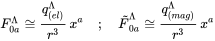

Label:


<IPython.core.display.Math object>

Tex formula: 

F _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( e l ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a } \quad ; \quad { \tilde { F } } _ { 0 a } ^ { \Lambda } \cong \frac { q _ { ( m a g ) } ^ { \Lambda } } { r ^ { 3 } } \, x ^ { a }


In [9]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

### Check  vocabulary 

In [10]:
print(data.vocabulary)

{'<S>': 0, '<E>': 1, '<P>': 2, '!': 3, '"': 4, '&': 5, '(': 6, ')': 7, '*': 8, '+': 9, ',': 10, '-': 11, '--': 12, '---': 13, '.': 14, '/': 15, '0': 16, '0.14': 17, '0.4': 18, '0.5': 19, '0.7': 20, '1': 21, '1.5': 22, '10': 23, '2': 24, '3': 25, '4': 26, '5': 27, '6': 28, '7': 29, '8': 30, '8.5': 31, '9': 32, ':': 33, ';': 34, '<': 35, '=': 36, '>': 37, '?': 38, '@': 39, 'A': 40, 'B': 41, 'C': 42, 'D': 43, 'E': 44, 'F': 45, 'G': 46, 'H': 47, 'I': 48, 'J': 49, 'K': 50, 'L': 51, 'M': 52, 'N': 53, 'O': 54, 'P': 55, 'Q': 56, 'R': 57, 'S': 58, 'T': 59, 'U': 60, 'V': 61, 'W': 62, 'X': 63, 'Y': 64, 'Z': 65, '[': 66, '\\': 67, '\\!': 68, '\\#': 69, '\\&': 70, '\\,': 71, '\\:': 72, '\\;': 73, '\\Big': 74, '\\Bigg': 75, '\\Biggl': 76, '\\Biggm': 77, '\\Biggr': 78, '\\Bigl': 79, '\\Bigm': 80, '\\Bigr': 81, '\\Box': 82, '\\Gamma': 83, '\\Huge': 84, '\\Im': 85, '\\Join': 86, '\\LARGE': 87, '\\Lambda': 88, '\\Large': 89, '\\Leftarrow': 90, '\\Leftrightarrow': 91, '\\Longleftarrow': 92, '\\Longleftri

In [11]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

,token,id,freq
575,{,575,2578717
577,},577,2578717
543,_,543,852123
542,^,542,720561
24,2,24,432506
...,...,...,...
503,\unlhd,503,1
177,\cl,177,1
1,<E>,1,0
2,<P>,2,0


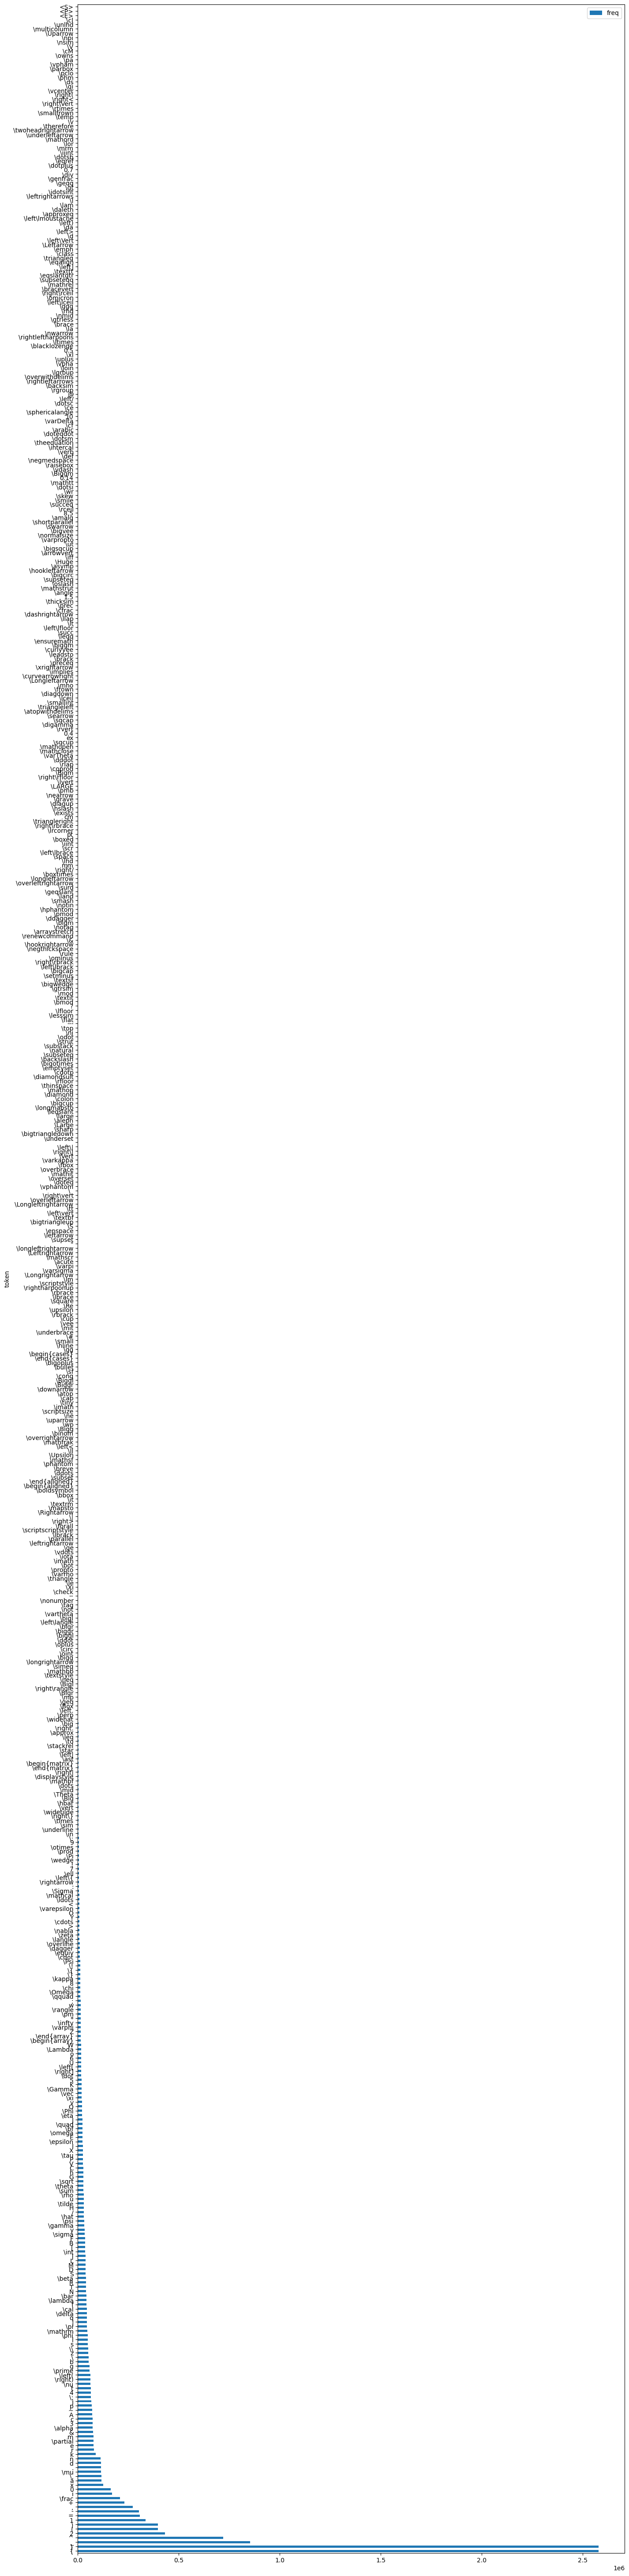

In [12]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [13]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

37    3924
35    3914
36    3883
39    3868
41    3831
      ... 
10      97
9       70
8       32
7       31
6        5
Name: tokenized_len, Length: 122, dtype: int64

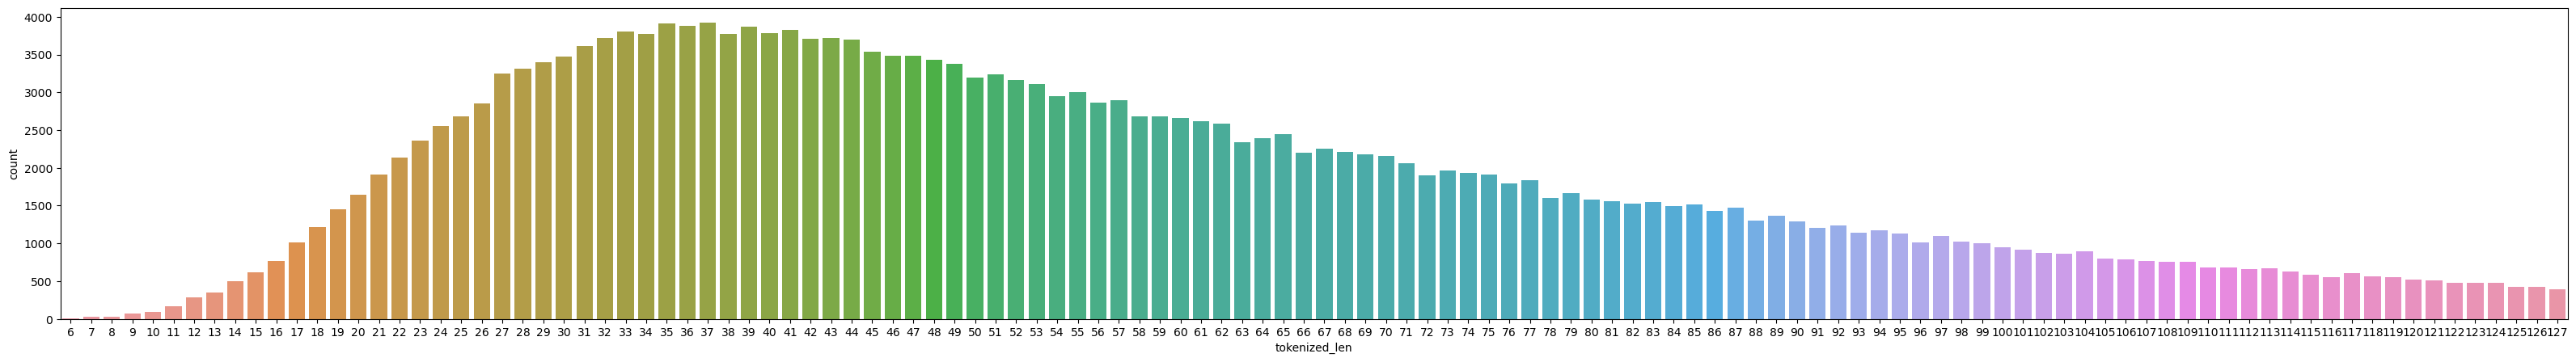

In [14]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

## Acessing the data

In [15]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


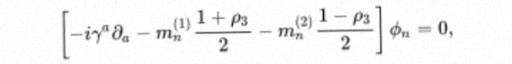

<S>\left[-i\gamma^{a}\partial_{a}-m_{n}^{(1)}{\frac{1+\rho_{3}}{2}}-m_{n}^{(2)}{\frac{1-\rho_{3}}{2}}\right]\phi_{n}=0,<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [16]:
transform = transforms.ToPILImage()
display(transform(data.data_train[1][0]))
print(token_to_strings(data.data_train[1][1]))